In [38]:
import pandas as pd
import numpy as np # Not always necessary
import matplotlib.pyplot as plt # Not always necessary
import seaborn as sns # Not always necessary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import time

In [39]:
tip = pd.read_csv("tip.csv")
tip.head()

,Unnamed: 0,Age,Employment_Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [40]:
tip = tip.drop("Unnamed: 0", axis=1)
tip.head()

,Age,Employment_Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Regression Logistic

In [41]:
# Separate target variable Y from features X
## Choose the columns you want to have as your features
features_list = ["Age", "Employment_Type", "GraduateOrNot", "AnnualIncome", "FamilyMembers", "ChronicDiseases", "FrequentFlyer", "EverTravelledAbroad"]

print("Splitting dataset into X and y...")
X = tip.loc[:,features_list] # We add feature_list into our loc 

y = tip.loc[:,"TravelInsurance"] # We set "Purchased" as the target variable
print("...Done.")

Splitting dataset into X and y...
...Done.


In [42]:
# Divide dataset Train set & Test set 
## First we import train_test_split


print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set

print("...Done.")  

Splitting dataset into train set and test set...
...Done.


In [43]:
### Training pipeline ###
print("--- Training pipeline ---")
print()  

# Encoding categorical features and standardizing numeric features

print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables


numeric_features = [0, 3, 4, 5] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [1, 2, 6, 7] # Choose which column index we are going to encode
categorical_transformer = OneHotEncoder()

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

--- Training pipeline ---

#### X_train BEFORE preprocessing ####
      Age               Employment_Type GraduateOrNot  AnnualIncome  \
688    33             Government Sector           Yes        400000   
1676   27             Government Sector           Yes       1050000   
1479   25  Private Sector/Self Employed           Yes       1400000   
581    28  Private Sector/Self Employed           Yes        700000   
220    35  Private Sector/Self Employed            No        800000   

      FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  
688               5                1            No                  No  
1676              7                0            No                  No  
1479              7                0            No                 Yes  
581               4                1            No                  No  
220               2                0            No                  No  

Encoding categorical features and standardizing numerical features..

In [44]:
# Training model 
print("Training model...")
classifier = LogisticRegression(random_state = 0) # Instanciate model 
classifier.fit(X_train, y_train) # Fit model
print("...Done.")

Training model...
...Done.


In [45]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

print("#### First five predictions on TRAIN set ####")
print(y_train_pred[0:5])

Predictions on train set...
...Done.

#### First five predictions on TRAIN set ####
[0 0 1 0 0]


In [46]:
### Test pipeline ###
print("--- Test pipeline ---") 

# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()

X_test = feature_encoder.transform(X_test)
print("...Done.")

print("#### X_test AFTER preprocessing ####")
print(X_test[0:5,:])
print()

--- Test pipeline ---
Encoding categorical features and standardizing numerical features...

...Done.
#### X_test AFTER preprocessing ####
[[ 0.          1.          0.          1.          1.          0.
   0.          1.         -1.60262576  1.26104933  0.12796172 -0.61201918]
 [ 0.          1.          0.          1.          1.          0.
   1.          0.         -1.25816852 -1.13489414  2.59258198 -0.61201918]
 [ 0.          1.          0.          1.          0.          1.
   0.          1.          1.49748935  1.52726527  0.74411678  1.63393573]
 [ 0.          1.          1.          0.          1.          0.
   1.          0.         -1.60262576  0.59550948 -0.48819335 -0.61201918]
 [ 0.          1.          0.          1.          1.          0.
   0.          1.          0.46411765  1.26104933  0.74411678 -0.61201918]]



In [47]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

print("#### First five predictions on TEST set ####")
print(y_train_pred[0:5])

Predictions on test set...
...Done.

#### First five predictions on TEST set ####
[0 0 1 0 0]


--- Assessment of performances ---


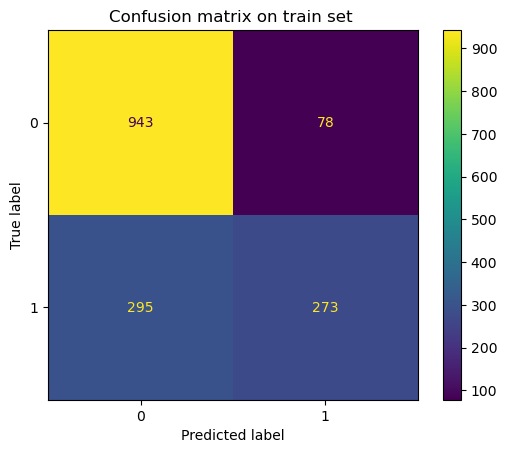

accuracy-score on train set :  0.7652611705475142


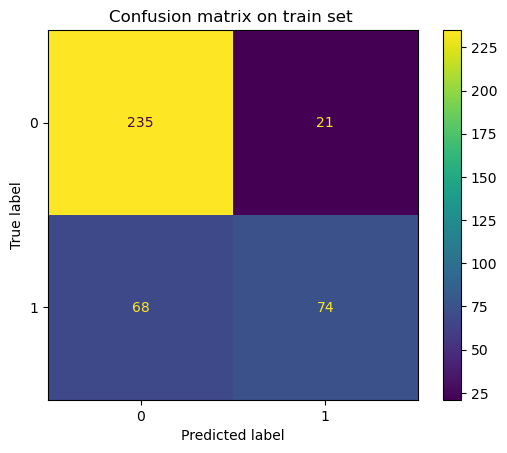

accuracy-score on test set :  0.7763819095477387


In [48]:
### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

In [49]:
# Check coefficients 

print("coefficients are: ", classifier.coef_) 
print("Constant is: ", classifier.intercept_)

# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

# Print numerical columns
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

# Append all columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)
print("All column names are: ",all_column_names)

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": feature_encoder.get_feature_names_out(), #Permet d'avoir le nom des colonnes au lieu du Yes No
    "coefficients":classifier.coef_.squeeze() # CAREFUL HERE. We need to access first index of our list because 
                                            # Data needs to be 1 dimensional
                                            # That's what .squeeze() is for
})

feature_importance

coefficients are:  [[-0.01857105  0.02777197  0.06497831 -0.05577739 -0.20526887  0.2144698
  -0.87485799  0.88405891  0.22114104  0.55896028  0.30450665  0.05935035]]
Constant is:  [0.00680268]
All transformers are:  [('cat', OneHotEncoder(), [1, 2, 6, 7]), ('num', StandardScaler(), [0, 3, 4, 5])]
One Hot Encoder transformer is:  OneHotEncoder()
Categorical columns are:  [array(['Government Sector', 'Private Sector/Self Employed'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object)]
numerical columns are:  Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases'], dtype='object')
All column names are:  ['Government Sector' 'Private Sector/Self Employed' 'No' 'Yes' 'No' 'Yes'
 'No' 'Yes' 'Age' 'AnnualIncome' 'FamilyMembers' 'ChronicDiseases']


,feature_names,coefficients
0,cat__Employment_Type_Government Sector,-0.018571
1,cat__Employment_Type_Private Sector/Self Employed,0.027772
2,cat__GraduateOrNot_No,0.064978
3,cat__GraduateOrNot_Yes,-0.055777
4,cat__FrequentFlyer_No,-0.205269
5,cat__FrequentFlyer_Yes,0.214470
6,cat__EverTravelledAbroad_No,-0.874858
7,cat__EverTravelledAbroad_Yes,0.884059
8,num__Age,0.221141
9,num__AnnualIncome,0.558960


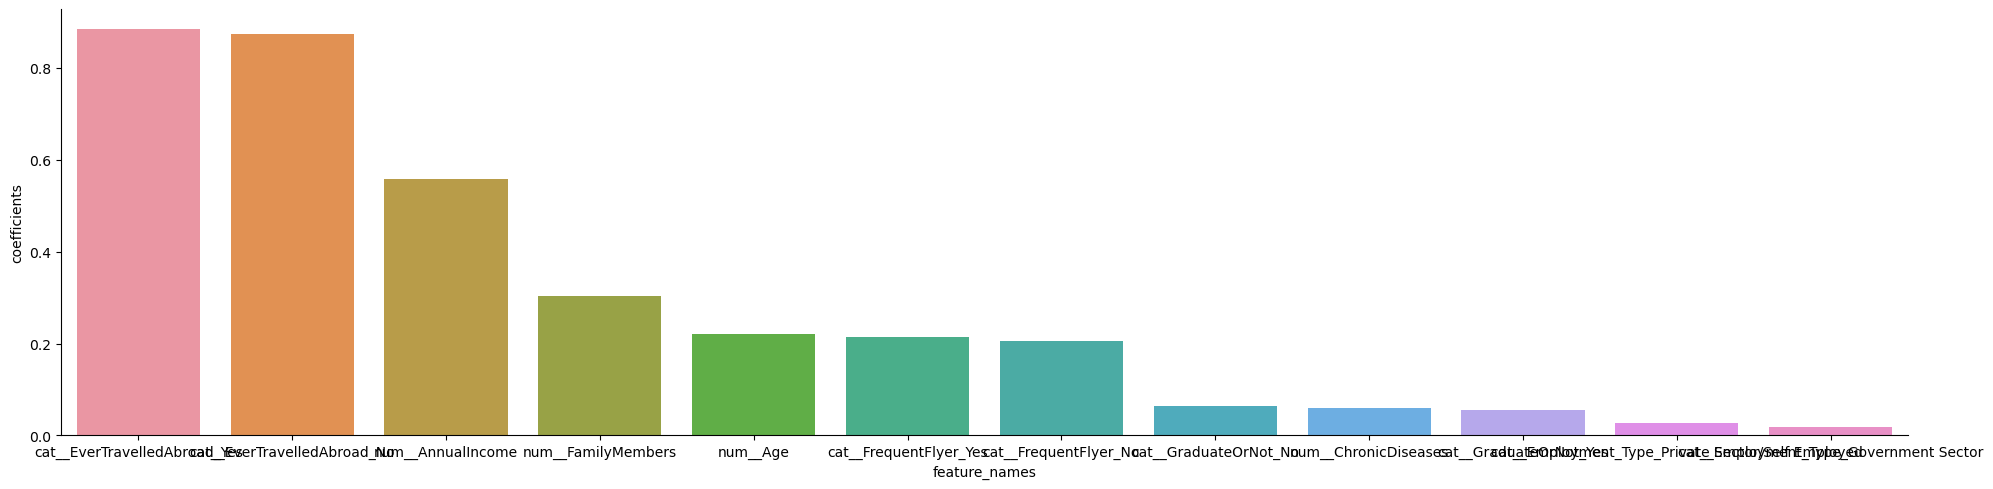

In [50]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=80/20) # Resize graph

## Decision Tree

In [51]:
# Training model
print("Training model...")
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [52]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [53]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



--- Assessment of performances ---


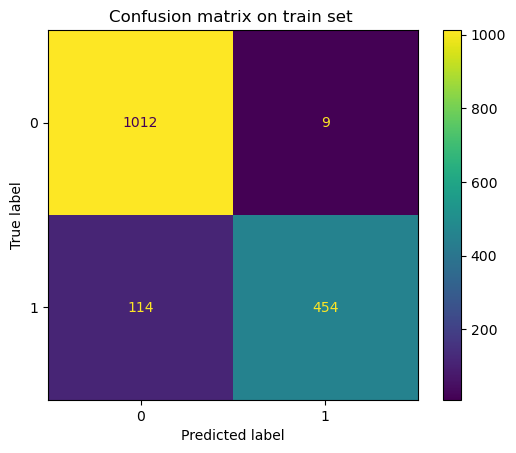

accuracy-score on train set :  0.9225928256765261


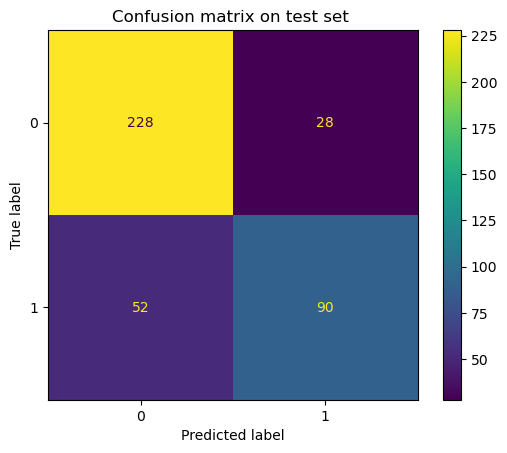

accuracy-score on test set :  0.7989949748743719


In [54]:
### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

In [55]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier.feature_importances_
                                        
})

feature_importance

,feature_names,coefficients
0,Government Sector,0.007349
1,Private Sector/Self Employed,0.003967
2,No,0.007464
3,Yes,0.003481
4,No,0.018550
5,Yes,0.018357
6,No,0.012916
7,Yes,0.009375
8,Age,0.135979
9,AnnualIncome,0.498130


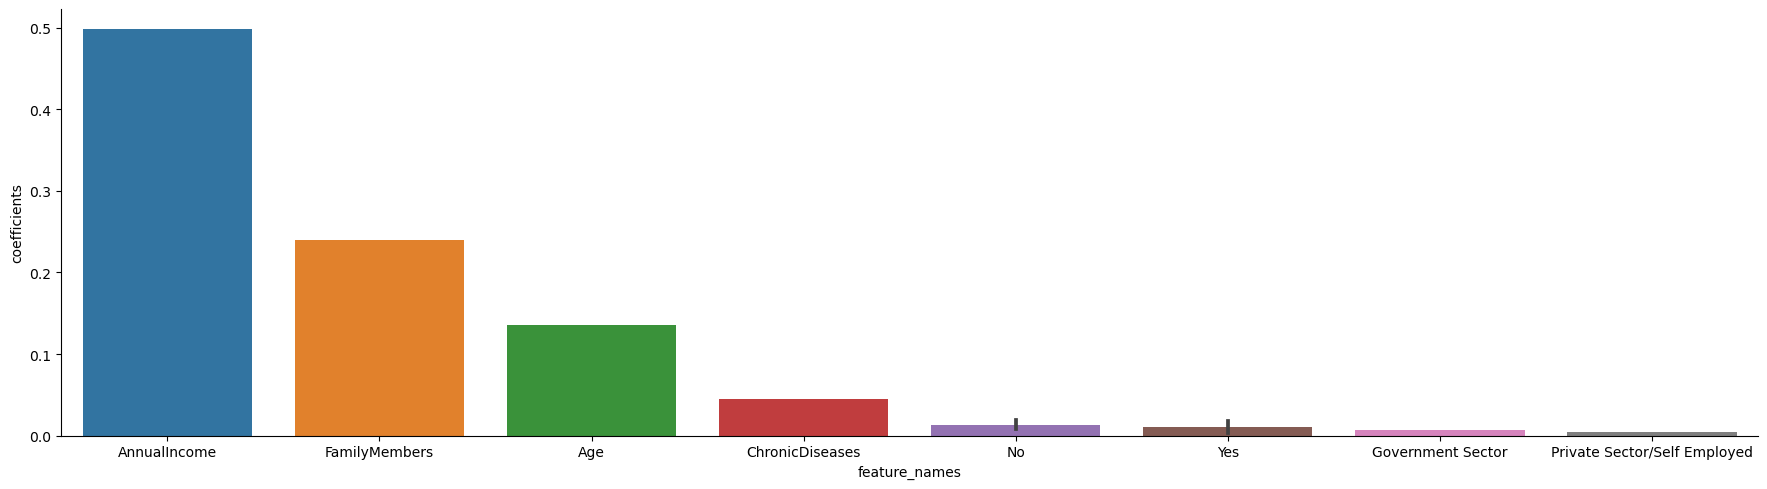

In [56]:
# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=32/9) # Resize graph

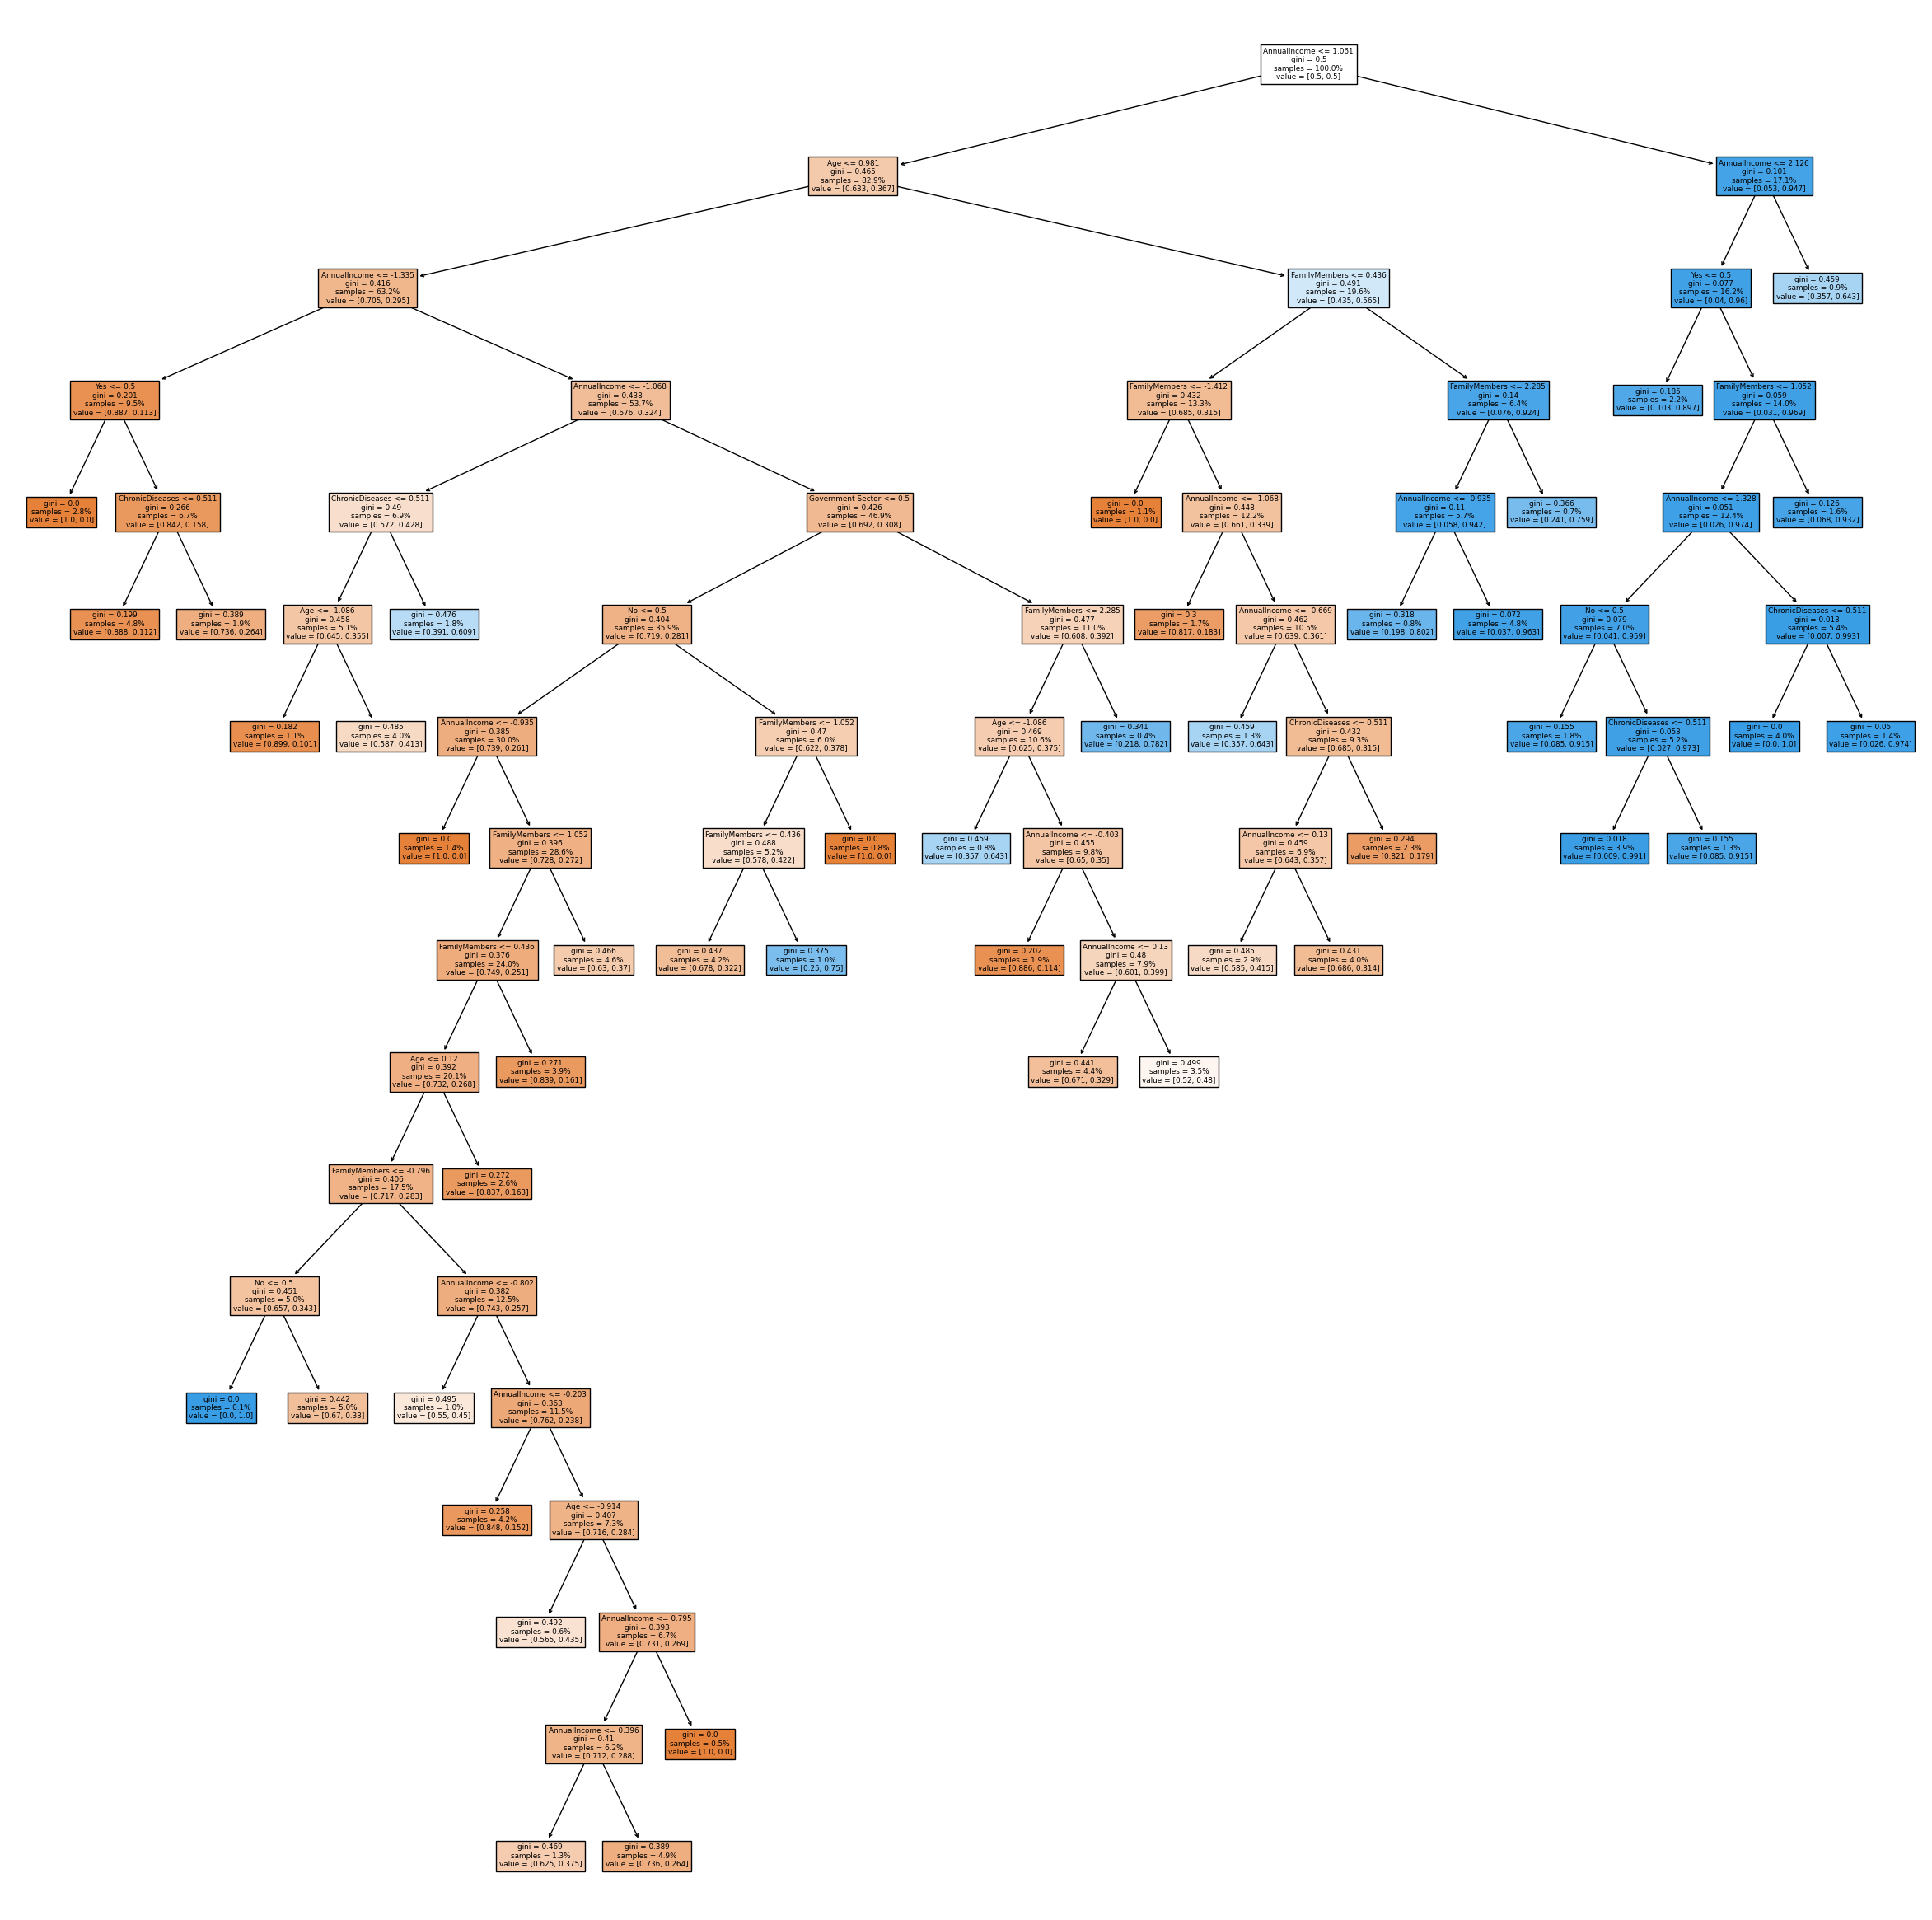

In [65]:
classifier = DecisionTreeClassifier(min_samples_split=80, class_weight="balanced" )
classifier.fit(X_train, y_train) # This steps is the actual training !


_, ax = plt.subplots(figsize=(30,30)) # Resize figure
plot_tree(classifier, filled=True, feature_names=all_column_names, proportion=True,ax=ax)
plt.show()

## Random Forrest

In [57]:
# Training model
print("Training model...")
classifier = RandomForestClassifier(n_estimators = 30)
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [58]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [59]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



--- Assessment of performances ---


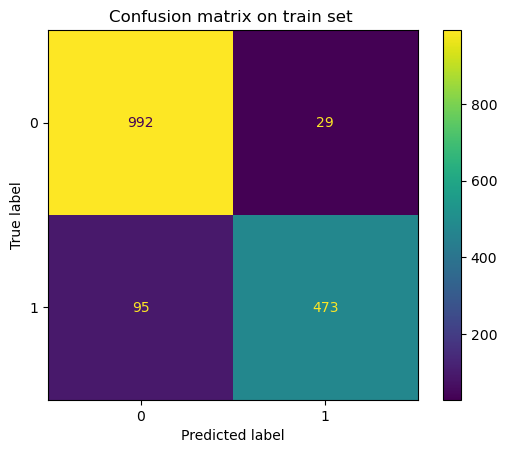

accuracy-score on train set :  0.92196349905601


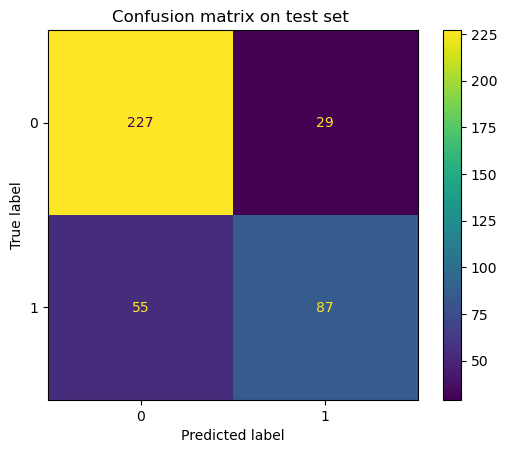

accuracy-score on test set :  0.7889447236180904
La fonction a pris 0.2542257308959961 secondes pour s'exécuter.


In [60]:
### Assessment of performances ###
print("--- Assessment of performances ---")

# Enregistrer le temps de départ
start_time = time.time()

# Plot confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

# Enregistrer le temps d'arrêt
end_time = time.time()

# Calculer la durée écoulée
duration = end_time - start_time

print("La fonction a pris {} secondes pour s'exécuter.".format(duration))

In [61]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier.feature_importances_
                                        
})

feature_importance

,feature_names,coefficients
0,Government Sector,0.012567
1,Private Sector/Self Employed,0.009405
2,No,0.007074
3,Yes,0.008937
4,No,0.018095
5,Yes,0.012929
6,No,0.088349
7,Yes,0.061693
8,Age,0.152888
9,AnnualIncome,0.359408


In [62]:
from sklearn.metrics import f1_score
y_train, y_train_pred
f1_score(y_train, y_train_pred)

0.8841121495327103

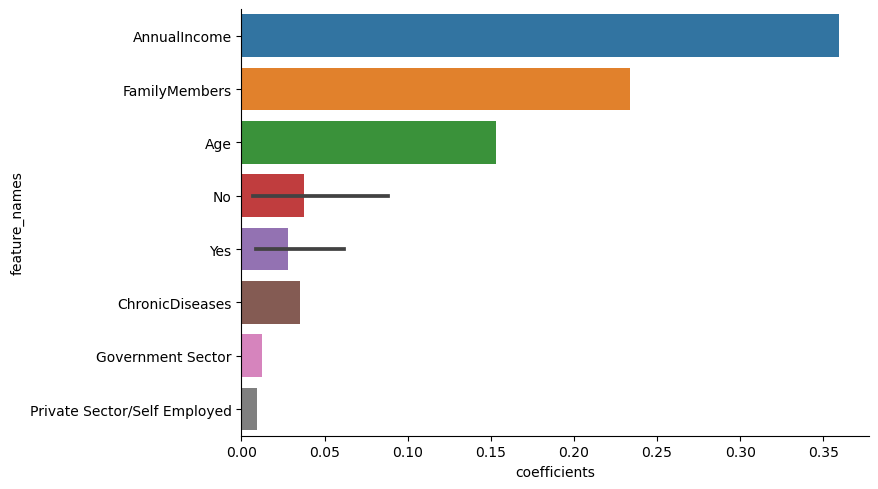

In [63]:
# Visualize ranked features using seaborn
sns.catplot(x="coefficients", 
            y="feature_names", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph